## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from scipy.stats import sem

# Study data files
mouse_metadata_path =  (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Matplotlib\The-Power-of-Plots\Data\Mouse_metadata.csv")
study_results_path = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Matplotlib\The-Power-of-Plots\Data\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
count = merged_data_df.index
number_of_rows = len(count)
print(number_of_rows)

1893


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_df[merged_data_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_data = merged_data_df[merged_data_df.duplicated(["Mouse ID"], keep = False)]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data_mouse = merged_data.drop_duplicates(subset=["Mouse ID"])
clean_data_mouse_df = clean_data.drop_duplicates(subset=["Mouse ID"])
clean_data_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data_mouse_df)
print(num_mice)

237


## Summary Statistics

In [29]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grouped = clean_data_mouse_df.groupby("Drug Regimen")
#drug_grouped = merged_data_df.groupby("Drug Regimen")
tumor_mean = drug_grouped["Tumor Volume (mm3)"].mean ()
tumor_median = drug_grouped["Tumor Volume (mm3)"].median()
tumor_var = drug_grouped["Tumor Volume (mm3)"].var()
std_tumor= drug_grouped["Tumor Volume (mm3)"].std()
sem_tumor = drug_grouped["Tumor Volume (mm3)"].sem()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_results= ({
    "Average Tumor Volume":tumor_mean, 
    "Median Tumor Volume":tumor_median, 
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Standard Deviation": std_tumor, 
    "Tumor Volume SEM": sem_tumor
})

#Combine series into a dataframe
summary_results_df = pd.DataFrame(summary_results)
summary_results_df



,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [30]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = summary_results_df.agg({"Average Tumor Volume": ["mean"],"Median Tumor Volume":["median"],"Tumor Volume Variance":["var"],"Tumor Volume Standard Deviation":["std"],"Tumor Volume SEM":["sem"]})
agg_df
#clean_agg_df = agg_df.dropna(axis = 0, how = "any")
#clean_agg_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
mean,45.0,NaN,NaN,NaN,NaN
median,NaN,45.0,NaN,NaN,NaN
sem,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,0.0,NaN
var,NaN,NaN,0.0,NaN,NaN


## Bar and Pie Charts

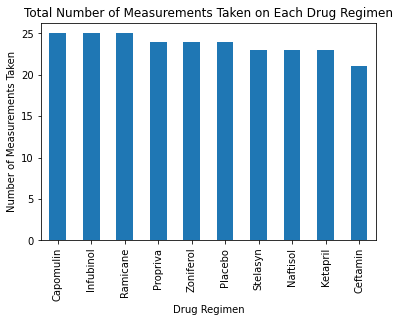

<Figure size 432x288 with 0 Axes>

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# use clean_data_mouse_df to determine the number of times each drug regimen was implemented
num_measurements_pandas= clean_data_mouse_df["Drug Regimen"].value_counts()
num_measurements_pandas

#Create a bar chart of the data
num_measurements_pandas.plot(x = clean_data_mouse_df["Drug Regimen"],y = num_measurements_pandas, kind ="bar")

#Create a title
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()
plt.tight_layout()

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#is a for loop and counter needed since pandas can't be used?
drug_regimen = ["Capomulin", "Infubinol", "Ramicane","Provpriva",""]
num_measurements = []

x_axis = np.arange(len(drug_regimen))
y_axis = np.arange(len(num_measurements))
tick_locations = []
for x in drug_regimen:
    tick_locations.append(x)

plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.bar(drug regimen, number of measurements performed)
plt.xticks(tick_locations,drug_regimen)
plt.show()
plt.tight_layout()

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data_mouse_df["Sex"].value_counts()
grouped = clean_data_mouse_df.groupby(["Drug Regimen","Sex"])
sum_it_up = grouped.count()
sum_it_up
#female ="Female"
#female_only= sum_it_up.loc[female]
#female_only
#female
#female =clean_data_mouse_df.loc[clean_data_mouse_df["Sex"] == "Female",:]
#male = 
#x_axis = [male, female]
#y_axis = clean

#plt.scatter()

Mouse ID  Age_months  Weight (g)  Timepoint  \
Drug Regimen Sex                                                   
Capomulin    Female        13          13          13         13   
             Male          12          12          12         12   
Ceftamin     Female        11          11          11         11   
             Male          10          10          10         10   
Infubinol    Female        12          12          12         12   
             Male          13          13          13         13   
Ketapril     Female         8           8           8          8   
             Male          15          15          15         15   
Naftisol     Female        11          11          11         11   
             Male          12          12          12         12   
Placebo      Female        13          13          13         13   
             Male          11          11          11         11   
Propriva     Female        11          11          11         11   
             Male          13          13          13         13   
Ramicane     Female         9           9           9          9   
             Male          16          16          16         16   
Stelasyn     Female        14          14          14         14   
             Male           9           9           9          9   
Zoniferol    Female        15          15          15         15   
             Male           9           9           9          9   

                     Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Sex                                           
Capomulin    Female                  13                13  
             Male                    12                12  
Ceftamin     Female                  11                11  
             Male                    10                10  
Infubinol    Female                  12                12  
             Male                    13                13  
Ketapril     Female                   8                 8  
             Male                    15                15  
Naftisol     Female                  11                11  
             Male                    12                12  
Placebo      Female                  13                13  
             Male                    11                11  
Propriva     Female                  11                11  
             Male                    13                13  
Ramicane     Female                   9                 9  
             Male                    16                16  
Stelasyn     Female                  14                14  
             Male                     9                 9  
Zoniferol    Female                  15                15  
             Male                     9                 9

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
